# Import needed libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

# Exploring the Data

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.duplicated().sum()

3

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


# Visualization

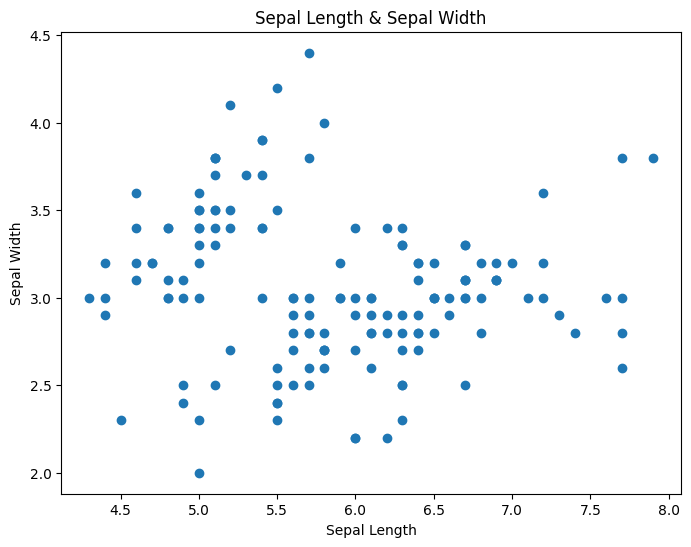

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df['sepal_length'] ,df['sepal_width'])
plt.title('Sepal Length & Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

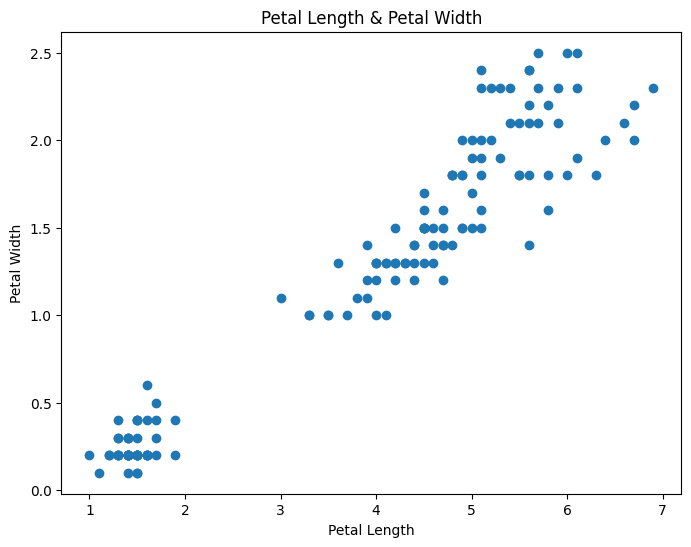

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df['petal_length'] ,df['petal_width'])
plt.title('Petal Length & Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Buliding the Model

In [10]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
x = df.drop('species', axis=1)
y = df['species']

In [13]:
X_train , X_test , Y_train ,Y_test = train_test_split(x ,y, test_size=0.2, random_state=11)

In [14]:
model = LogisticRegression(max_iter=10)

In [15]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10)

In [16]:
model.score(X_train, Y_train)

0.9658119658119658

In [17]:
y_predict = model.predict(X_test)

In [18]:
accuracy = accuracy_score(Y_test, y_predict)
accuracy

1.0